-----
## Part 1: Analyze the network

The questions in this part are based on Lecture 5.

- **Present an analysis/description of the network of bands/artists using tools from Lecture 5. Imagine that you have been tasked with presenting the important facts about the network to an audience who knows about network science, but doesn't know about this particular network.**
    - It's OK to also use basic concepts like degree distributions (even though they're from week 4) in your analysis. That way you can make the analysis a standalone, coherent thing.
    - I would like you to include concepts like centrality and assortativity in your analysis.
    - Use a network backbone in your analysis.
    - In addition to standard distribution plots (e.g. degree distributions, etc), your analysis should also include at least one network visualization (but it doesn't have to display the entire network, you can also visualize a network backbone).
    - Note: As I write above, an important part of the exercise consists is selecting the right elements of the lecture to create a meaningful analysis. So don't solve this part by going exhaustive and just calculating everything you can think of in one massive analysis. Try to focus on using what you've learned to characterize the network.
------

The network in question is a directed graph. 
The nodes are mainstream rock bands/performers (a list taken from wikipedia). The edges between nodes represent links between the wikipedia pages of the bands. Meaning, an edges from node 1 to node 2 represents a link in the wiki page of band 1 to the wiki page of band 2.
The network nodes (performers) has an atribute, "word_count", which represents the number of words in the wiki page of the performer.

A thourough walk through on how this network was made was given in Assignment 1. 

Below is the number of edges and nodes printed. To visualis the network, we have plotted the undirected version.

Number of nodes in G: 472
Number of edges in G: 7100


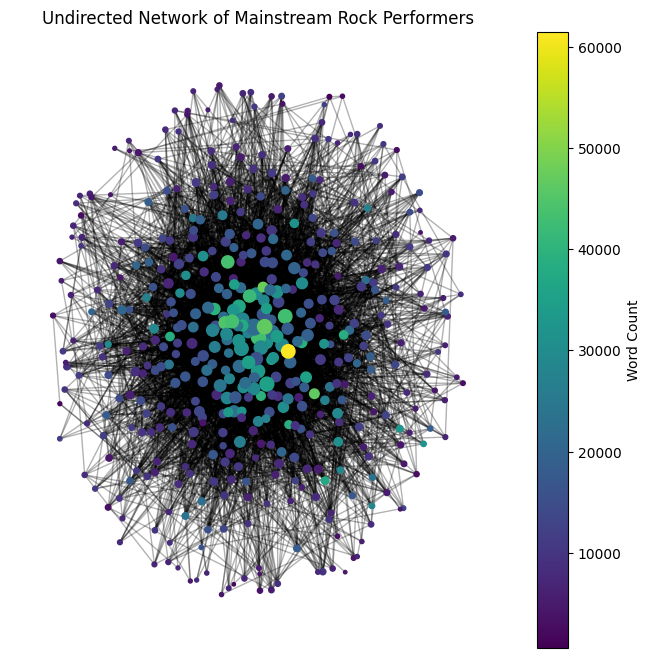

In [39]:
#  Loading the graph from Github as decribed in the exercise
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import requests
import random

# TODO load rigtig graf fra git!!! TJEK at AllMusic ikke er med!!! (se degrees nedenfor))

# load graph from URL
#url = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Noa/Bands_graph.graphml"# Loading graph from a GraphML file from a URL
#data = requests.get(url).text  
#G = nx.parse_graphml(data)

# load graph from local file
G = nx.read_graphml(r"/Users/iben/Desktop/Social_graphs/SocialGraphs/Noa/Bands_graph.graphml")

#### BASIC INFO
print(f"Number of nodes in G: {G.number_of_nodes()}")
print(f"Number of edges in G: {G.number_of_edges()}")

### VISULISATION
G_undirected = G.to_undirected()
# plot 
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G_undirected, seed=42, k = 0.8)  # positions for all 
#pos = nx.forceatlas2_layout(GCC_undirected, seed=42, strong_gravity=True)  # positions for all nodes

# node sizes based on degree
node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]

# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()

Above, the network of mainstream rock performers is displayed. It has 473 nodes and 7452 edges. The size of the node represents the degree, ie. a big node has high degree and a small has low degree. The color of the node represents the word count of the wikipage of the performer, where yellow/green is a longer wiki page and purple/blue is a shorter wiki page. It is evident that the graph is highly connected and it is difficult to see anything specific because of the many edges making everything black.

To further investigate, we look at the degree, in-degree and out-degree distribution of the nodes. 

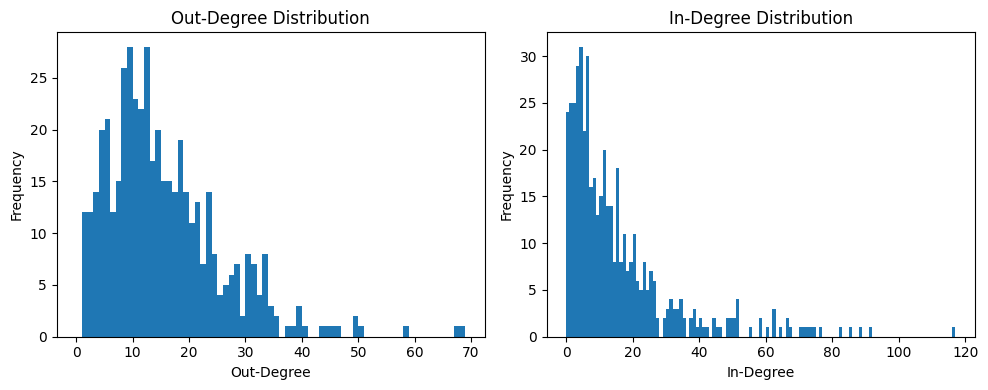

In [40]:
# out degrees of all nodes in G
out_degrees = [d for n, d in G.out_degree()]
# in degrees of all nodes in G
in_degrees = [d for n, d in G.in_degree()]

# plot histograms of out degrees and in degrees in 3 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(out_degrees, bins=range(max(out_degrees)+1))
axs[0].set_title('Out-Degree Distribution')
axs[0].set_xlabel('Out-Degree')
axs[0].set_ylabel('Frequency')

axs[1].hist(in_degrees, bins=range(max(in_degrees)+1))
axs[1].set_title('In-Degree Distribution')
axs[1].set_xlabel('In-Degree')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
    

The plots show out-degree (left) and in-degree (right) distributions of the network. The bins are size one on both graphs, the first bin (between 0 and 1 on the x-axis) represents the nodes having in/put degree 0 and so on for the following bins.  
We observe that there is a difference in the out and in degree. The in degree distribution is heavily skewed to the left and the out degree is slightly skewed to the left. The peak is right above 10 for the out-degree distribution. The peak of the in-degree distribution is around 5. Furthermore no nodes have out-degree 0, but many have in-degree 0, meaning no bands does not link to others while many are not linked to. This behavior supports that there is a small group "elite" bands that a lot of the nodes point to, who has a high in-degree. From the right plot we see that a handfull of nodes has in-degree higher than 80 and around 20 has higher than 60.
There are more nodes with low in-degree, than nodes with low out-degree. Which means that many link to more than one other band, while many are not linked to by other bands or only by few. 

This leads use to look at out-degree vs in-degree for the nodes. This we will do in a scatterplot below.


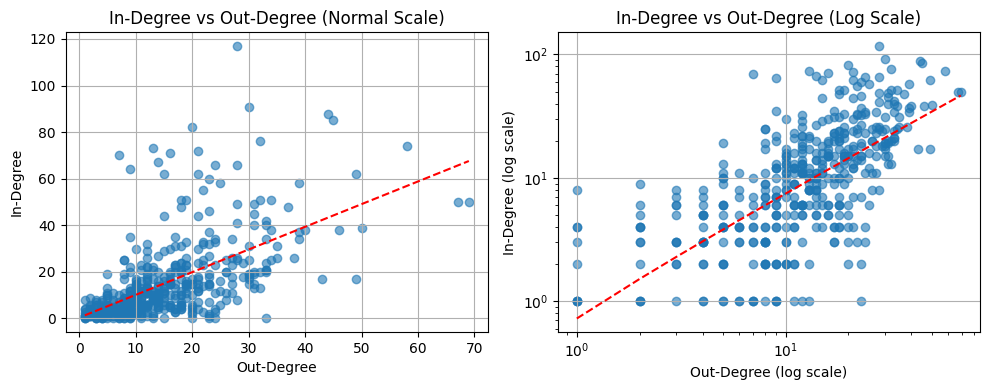

Node with high out-degree and zero in-degree: ['Mötley_Crüe']
Nodes with high in-degree and low out-degree: ['Pink_Floyd', 'Elvis_Presley']


In [41]:
# plot of in-degree vs out-degree scatterplot both in normal and log scale (subplots)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# non log
axs[0].scatter(out_degrees, in_degrees, alpha=0.6)
axs[0].set_xlabel('Out-Degree')
axs[0].set_ylabel('In-Degree')
axs[0].set_title('In-Degree vs Out-Degree (Normal Scale)')
axs[0].grid(True)
# make tendency line
z = np.polyfit(out_degrees, in_degrees, 1)
p = np.poly1d(z)
axs[0].plot(sorted(out_degrees), p(sorted(out_degrees)), "r--")

# log scale
axs[1].scatter(out_degrees, in_degrees, alpha=0.6)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Out-Degree (log scale)')
axs[1].set_ylabel('In-Degree (log scale)')
axs[1].set_title('In-Degree vs Out-Degree (Log Scale)')
axs[1].grid(True)
# make tendency line in log scale
log_out_degrees = np.log1p(out_degrees)
log_in_degrees = np.log1p(in_degrees)
z_log = np.polyfit(log_out_degrees, log_in_degrees, 1)
p_log = np.poly1d(z_log)
sorted_log_out_degrees = np.sort(log_out_degrees)
axs[1].plot(np.expm1(sorted_log_out_degrees), np.expm1(p_log(sorted_log_out_degrees)), "r--")
plt.tight_layout()
plt.show()

# There is one node with high outdegree (above 30) but low indegree (= 0).
# Find this node:
special_node_low_in = [n for n in G.nodes() if G.out_degree(n) > 30 and G.in_degree(n) == 0]

# There is two nodes with in degree above 60 and out degree below 10.
special_nodes_low_out = [n for n in G.nodes() if G.in_degree(n) > 60 and G.out_degree(n) < 10]


print(f"Node with high out-degree and zero in-degree: {special_node_low_in}")
print(f"Nodes with high in-degree and low out-degree: {special_nodes_low_out}")



The scatterplots above displays the indegree vs outdegree for all nodes in the network. The left displays on a normal scale and the right on a log scale (both x and y). A tendcy line is marked with red on both plots.

In the left plot (normal scale), the nodes are clustered in the bottom left corner, meaning that most nodes have low out or/and in degree. There is a slight linear tendency, where the tendency shows that nodes has a higher out degree then in degree. There is a handfull, that has evidently higher in and/or out degrees than the others. 

On the log scale plot, the linear trend seems more evident. Though here, the tendency line does not show that nodes has higher out-degree. 

It is clear on the plots, that there is a band that does link to many bands (above 30) but has no bands linking to them. This we have found to be Mötley Crüe. Furthermore there is two bands, that has many linking to them (above 60) but very few they link to (below 10), these are Pink Floyd and Elvis Presley. 

It makes sense that the band forst band (with low in-degree and high out-degree) is one we have never heard of, while the two bands with opposite degree properties are very known and defining performers. 